In [3]:
import tensorflow as tf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import numpy as np
import pickle
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Load MNIST data from tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
# mnist_one_hot = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
train_images = mnist.train.images
train_labels = mnist.train.labels
test_images = mnist.test.images
test_labels = mnist.test.labels

In [6]:
def trainRandomForest(index):
    model = RandomForestClassifier(n_estimators=index,n_jobs=4)
#     print index
#     model.random_state(index)
    model.fit(train_images, train_labels)
    return model

models = {}
for i in [3,25,77,99]:
    print i
    model = trainRandomForest(i)
    models[i] = model

# joblib.dump(models, 'random_forest_models.pkl')
# print models

3
25
77
99


In [ ]:
clf.estimators_[i].predict_proba(np.reshape(test_samples[idx],(1,-1)))[0]

In [51]:
print test_labels[7]
print models[3].estimators_[0].predict_proba(np.reshape(test_images[7],(1,-1)))[0]
print models[3].estimators_[1].predict_proba(np.reshape(test_images[7],(1,-1)))[0]
print models[3].estimators_[2].predict_proba(np.reshape(test_images[7],(1,-1)))[0]
print models[3].predict_log_proba(np.reshape(test_images[7],(1,-1)))

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[       -inf        -inf        -inf        -inf -1.09861229 -1.09861229
         -inf        -inf        -inf -1.09861229]]


/home/ruby/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:623: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


In [53]:
print test_labels[8]
print models[3].estimators_[0].predict_proba(np.reshape(test_images[8],(1,-1)))[0]
print models[3].estimators_[1].predict_proba(np.reshape(test_images[8],(1,-1)))[0]
print models[3].estimators_[2].predict_proba(np.reshape(test_images[8],(1,-1)))[0]
print models[3].predict_log_proba(np.reshape(test_images[8],(1,-1)))
print models[3].predict(np.reshape(test_images[8],(1,-1)))

5
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[       -inf        -inf        -inf        -inf -1.09861229        -inf
  -1.09861229        -inf -1.09861229        -inf]]
[4]


In [35]:
def plot_uncertainty(model,test_images,test_labels):
    predicted_output = model.predict_proba(test_images)
    
    zero = np.where(test_labels == 0)[0]
    one = np.where(test_labels == 1)[0]
    two = np.where(test_labels == 2)[0]
    three = np.where(test_labels == 3)[0]
    four = np.where(test_labels == 4)[0]
    five = np.where(test_labels == 5)[0]
    six = np.where(test_labels == 6)[0]
    seven = np.where(test_labels == 7)[0]
    eight = np.where(test_labels == 8)[0]
    nine = np.where(test_labels == 9)[0]
    fig, ax = plt.subplots(1,figsize=(8,6))
    
    ax.hist(predicted_output[zero, 0], histtype='step', label='zero')
    ax.hist(predicted_output[one, 1], histtype='step', label='one')
    ax.hist(predicted_output[two, 2], histtype='step', label='two')
    ax.hist(predicted_output[three, 3], histtype='step', label='three')
    ax.hist(predicted_output[four, 4], histtype='step', label='four')
    ax.hist(predicted_output[five, 5], histtype='step', label='five')
    ax.hist(predicted_output[six, 6], histtype='step', label='six')
    ax.hist(predicted_output[seven, 7], histtype='step', label='seven')
    ax.hist(predicted_output[eight, 8], histtype='step', label='eight')
    ax.hist(predicted_output[nine, 9], histtype='step', label='nine')

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
              ncol=5, fancybox=True, shadow=True)
    
    ax.set_xlabel('Prediction (Classes probability)')
    ax.set_ylabel('Number of observations')

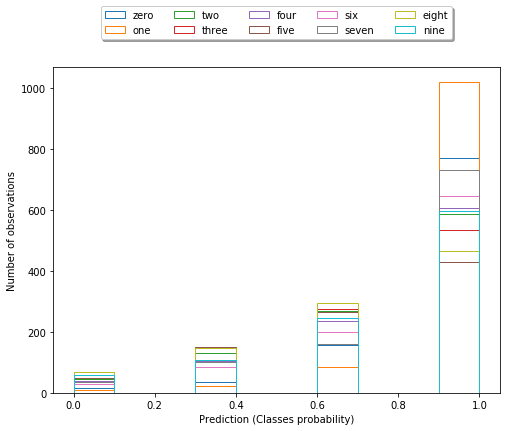

In [36]:
plot_uncertainty(models[3],test_images,test_labels)

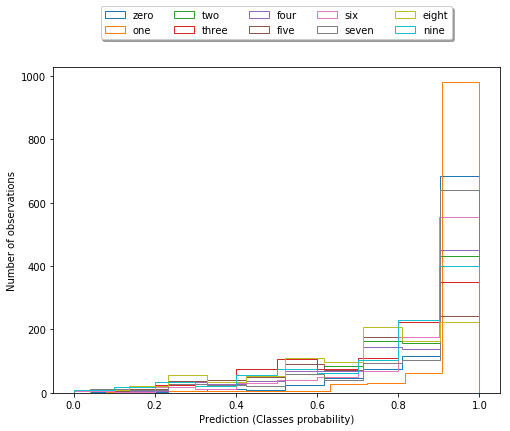

In [37]:
plot_uncertainty(models[25],test_images,test_labels)

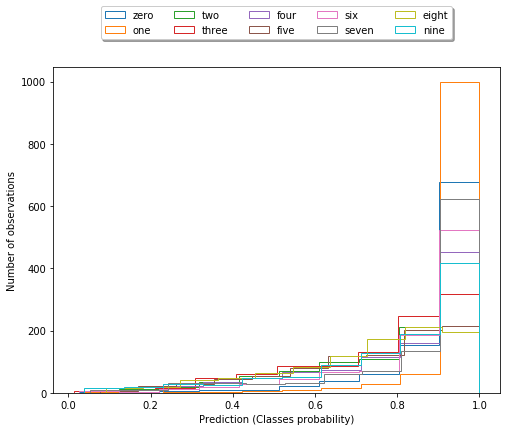

In [38]:
plot_uncertainty(models[77],test_images,test_labels)

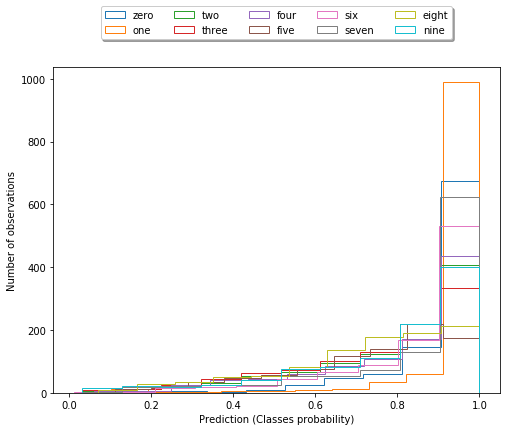

In [39]:
plot_uncertainty(models[99],test_images,test_labels)

In [22]:
print models[25].score(test_images,test_labels)

0.9631


In [23]:
print models[77].score(test_images,test_labels)

0.9686


In [24]:
print models[99].score(test_images,test_labels)

0.9675


In [63]:

# models[0].predict(test_images)
print models[0].score(test_images, test_labels)
print models[0].estimators_[0].score(test_images, test_labels)
# models[0].predict(test_images)
# print models[1].score(test_images, test_labels)
print models[0].estimators_[1].score(test_images, test_labels)

0.822
0.8185
0.8216
